<h1 align="right" style="color: #FF5733">TITANIC MACHINE LEARNING FROM DISASTER</h1>
<h3 align="right">Prashant Sundge</h3>


# TITANIC MACHINE LEARNING FROM DISASTER

## Table of Contents
1. [Introduction](#introduction)
2. [The Challenge](#the-challenge)
3. [Data Overview](#data-overview)
    1. [Dataset Description](#dataset-description)
    2. [Overview](#overview)
    3. [Data Dictionary](#data-dictionary)
    4. [Variable Notes](#variable-notes)
4. [Import Library](#import-library)
5. [Exploratory Data Analysis](#exploratory-data-analysis)
6. [Train Test Split](#train-test-split)
7. [Standard Scaler](#standard-scaler)
8. [Naive Bayes Model](#naive-bayes-model)
    1. [Accuracy](#accuracy)
    2. [Classification Report](#classification-report)
    3. [Confusion Matrix](#confusion-matrix)
9. [Decision Tree](#decision-tree)
    1. [Accuracy](#accuracy)
    2. [Classification Report](#classification-report)
    3. [Confusion Matrix](#confusion-matrix)
10. [Random Forest Model](#random-forest-model)
    1. [Accuracy](#accuracy)
    2. [Classification Report](#classification-report)
    3. [Confusion Matrix](#confusion-matrix)
11. [Naive Bayes Model](#naive-bayes-model)
    1. [Accuracy](#accuracy)
    2. [Classification Report](#classification-report)
    3. [Confusion Matrix](#confusion-matrix)
12. [Working on Test Dataset to Predict](#working-on-test-dataset-to-predict)
    1. [Test Data Processing](#accuracy)
    2. [Standard Scaler](#classification-report)
    3. [Gender Submission Dataset ](#confusion-matrix)
    4. [Accuracy](#accuracy)
    5. [Classification Report](#classification-report)
    6. [Confusion Matrix](#confusion-matrix)



# Introduction

## The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (i.e., name, age, gender, socio-economic class, etc).


# Data-overview

# Dataset Description

### Overview

The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)


- **The training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

- **The test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

- We also include `gender_submission.csv`, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.


# Data-dictionary

| Variable  | Definition                   | Key                                      |
|-----------|------------------------------|------------------------------------------|
| survival  | Survival                     | 0 = No, 1 = Yes                          |
| pclass    | Ticket class                 | 1 = 1st, 2 = 2nd, 3 = 3rd              |
| sex       | Sex                          |                                        |
| Age       | Age in years                 |                                        |
| sibsp     | # of siblings / spouses      |                                        |
|           | aboard the Titanic           |                                        |
| parch     | # of parents / children      |                                        |
|           | aboard the Titanic           |                                        |
| ticket    | Ticket number                |                                        |
| fare      | Passenger fare               |                                        |
| cabin     | Cabin number                 |                                        |
| embarked  | Port of Embarkation          | C = Cherbourg, Q = Queenstown, S = Southampton |


**Variable Notes:**

- **pclass:** A proxy for socio-economic status (SES)
  - 1st = Upper
  - 2nd = Middle
  - 3rd = Lower

- **age:** Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5.

- **sibsp:** The dataset defines family relations in this way:
  - Sibling = brother, sister, stepbrother, stepsister
  - Spouse = husband, wife (mistresses and fiancés were ignored)

- **parch:** The dataset defines family relations in this way:
  - Parent = mother, father
  - Child = daughter, son, stepdaughter, stepson
  - Some children traveled only with a nanny, therefore parch=0 for them.


# IMPORT LIBRARY 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv('data\\train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### NOTES 

- AGE has missing values 
- cabin has only 204 values 
- Embarkded has 2 missing values 

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Age Null values has been filled with Median values

In [6]:
data['Age'].median()
data['Age']=data['Age'].fillna(data['Age'].median())

In [7]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

- For Now will drop the Cabin column as we can see 687 nan values 
- Also we will remove PassangeID , Name , Ticket columns 

In [8]:
data1=data.drop(columns=['PassengerId','Name','Ticket', 'Cabin'], axis=1)

In [9]:
data1.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S


In [10]:
data1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [11]:
data1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
data1['Embarked'].dropna(inplace=True)

In [13]:
data1 = data1.dropna(subset=['Embarked'])

In [14]:
data1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# EXPLORATORY DATA ANALYSIS 

<AxesSubplot:xlabel='Sex', ylabel='count'>

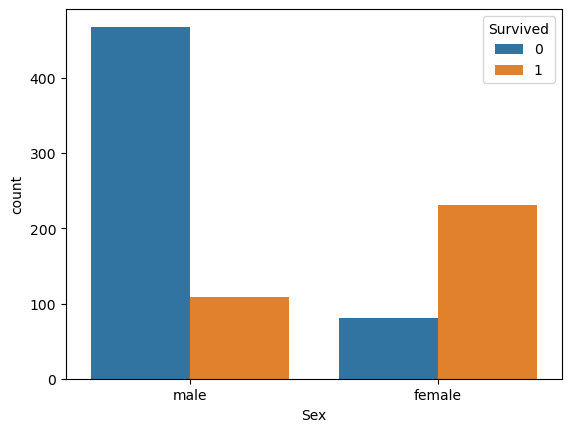

In [16]:
sns.countplot(data=data1, x='Sex', hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

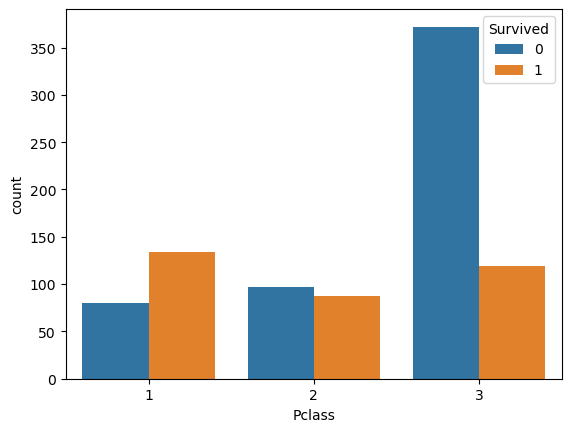

In [17]:
sns.countplot(data=data1, x='Pclass', hue='Survived')

<AxesSubplot:xlabel='Parch', ylabel='count'>

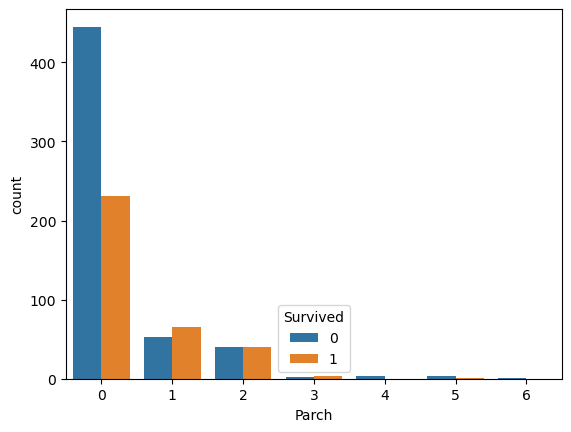

In [18]:
sns.countplot(data=data1, x='Parch', hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

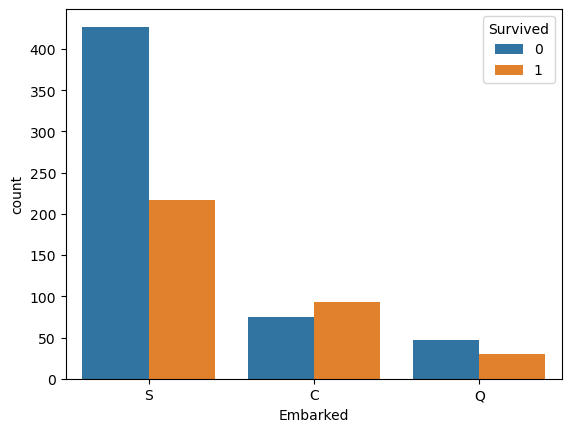

In [19]:
sns.countplot(data=data1, x='Embarked', hue='Survived')

<AxesSubplot:xlabel='Fare', ylabel='Age'>

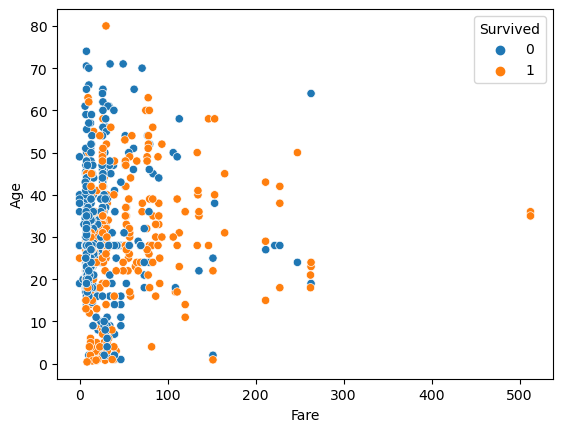

In [20]:
sns.scatterplot(data=data1, x='Fare', y='Age',hue='Survived')

In [21]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [22]:
data1['Sex'].replace({'male':1, 'female':0}, inplace=True)

In [23]:
data1['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [24]:
data1 = pd.get_dummies(data1, columns=['Embarked'], prefix=['Embarked'])

In [25]:
data1.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.335549,-0.541585,-0.069822,-0.034040,0.083151,0.255290,0.169966,0.004536,-0.151777
Pclass,-0.335549,1.000000,0.127741,-0.336512,0.081656,0.016824,-0.548193,-0.245733,0.220558,0.076466
Sex,-0.541585,0.127741,1.000000,0.086506,-0.116348,-0.247508,-0.179958,-0.084520,-0.075217,0.121405
Age,-0.069822,-0.336512,0.086506,1.000000,-0.232543,-0.171485,0.093707,0.032098,-0.030436,-0.008964
SibSp,-0.034040,0.081656,-0.116348,-0.232543,1.000000,0.414542,0.160887,-0.060074,-0.026692,0.069438
Parch,0.083151,0.016824,-0.247508,-0.171485,0.414542,1.000000,0.217532,-0.011588,-0.081585,0.061512
Fare,0.255290,-0.548193,-0.179958,0.093707,0.160887,0.217532,1.000000,0.270731,-0.116684,-0.163758
Embarked_C,0.169966,-0.245733,-0.084520,0.032098,-0.060074,-0.011588,0.270731,1.000000,-0.148646,-0.782613
Embarked_Q,0.004536,0.220558,-0.075217,-0.030436,-0.026692,-0.081585,-0.116684,-0.148646,1.000000,-0.499261
Embarked_S,-0.151777,0.076466,0.121405,-0.008964,0.069438,0.061512,-0.163758,-0.782613,-0.499261,1.000000


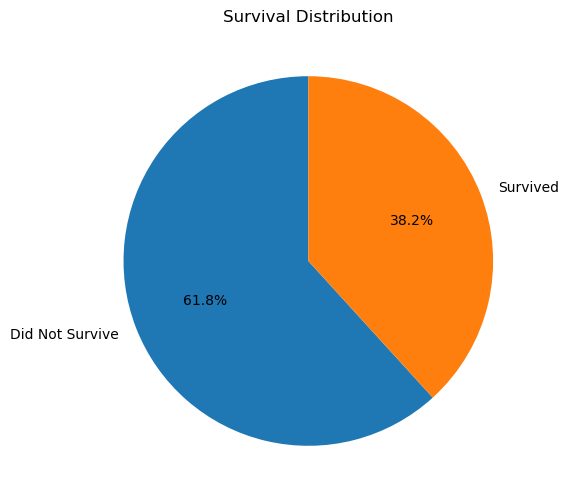

In [26]:
survived_count = data1['Survived'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(survived_count, labels=['Did Not Survive', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Survival Distribution')

plt.show()


<AxesSubplot:>

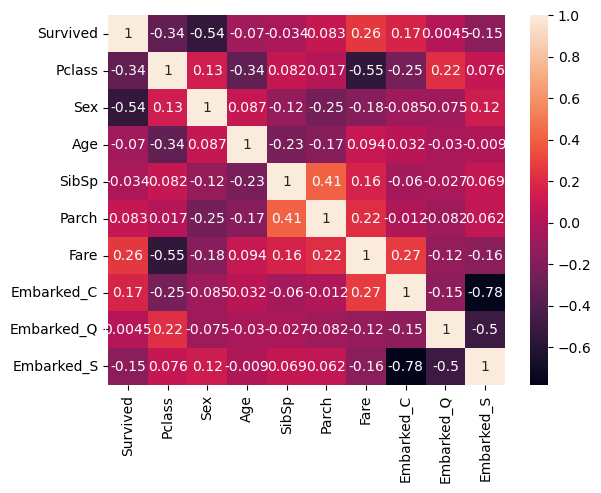

In [27]:
sns.heatmap(data1.corr(), annot=True,)

In [28]:
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


# TRAIN TEST SPLIT

In [29]:
y=data1['Survived']

In [30]:
X=data1.drop('Survived', axis=1)

In [31]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1


# STANDARD SCALER

In [32]:
scale=StandardScaler()

In [33]:
X_scaled =scale.fit_transform(X)

In [34]:
X=pd.DataFrame(X_scaled)

In [35]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.30, random_state=123)

# NAIVE BAYES MODEL

In [36]:
gnb=GaussianNB()

In [37]:
gnb.fit(X_train, y_train)

GaussianNB()

In [38]:
y_pred=gnb.predict(X_test)

In [39]:
print("Number of mislabeled points out of a total %d points : %d"       % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 267 points : 60


# ACCURECY

In [40]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7752808988764045


[[137  24]
 [ 36  70]]


<AxesSubplot:>

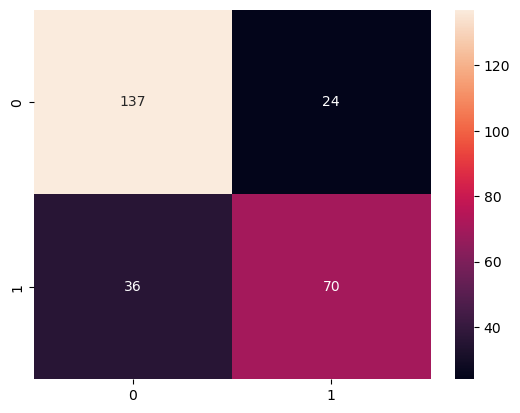

In [41]:
confusion=confusion_matrix(y_test, y_pred)
print(confusion)
sns.heatmap(confusion, annot=True, fmt='d')

In [42]:
classification=classification_report(y_test, y_pred)
print("Classification Report")
print(classification)

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       161
           1       0.74      0.66      0.70       106

    accuracy                           0.78       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.77      0.78      0.77       267



# DECISION TREE

In [43]:
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [44]:
selected_col=['Survived', 'Pclass','Sex','Age','SibSp', 'Parch', 'Fare']

In [45]:
df=data1[selected_col]

In [46]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [47]:
y=df['Survived']

In [48]:
X=df.drop('Survived', axis=1)

In [49]:
scaler=StandardScaler()

In [50]:
X_df=scaler.fit_transform(X)

In [51]:
X=pd.DataFrame(X_df)

In [52]:
X

,0,1,2,3,4,5
0,0.825209,0.735342,-0.563674,0.431350,-0.474326,-0.500240
1,-1.572211,-1.359911,0.669217,0.431350,-0.474326,0.788947
2,0.825209,-1.359911,-0.255451,-0.475199,-0.474326,-0.486650
3,-1.572211,-1.359911,0.438050,0.431350,-0.474326,0.422861
4,0.825209,0.735342,0.438050,-0.475199,-0.474326,-0.484133
...,...,...,...,...,...,...
884,-0.373501,0.735342,-0.178396,-0.475199,-0.474326,-0.384475
885,-1.572211,-1.359911,-0.794841,-0.475199,-0.474326,-0.042213
886,0.825209,-1.359911,-0.101340,0.431350,2.006119,-0.174084
887,-1.572211,0.735342,-0.255451,-0.475199,-0.474326,-0.042213


In [53]:
x_train, x_test,y_train, y_test=train_test_split(X,y, test_size=0.33,random_state=123)

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
model=DecisionTreeClassifier()

In [56]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [57]:
y_pred=model.predict(x_test)

In [58]:
accurecy=accuracy_score(y_test,y_pred)
print(accurecy)

0.7517006802721088


              precision    recall  f1-score   support

           0       0.78      0.82      0.80       177
           1       0.70      0.65      0.68       117

    accuracy                           0.75       294
   macro avg       0.74      0.73      0.74       294
weighted avg       0.75      0.75      0.75       294



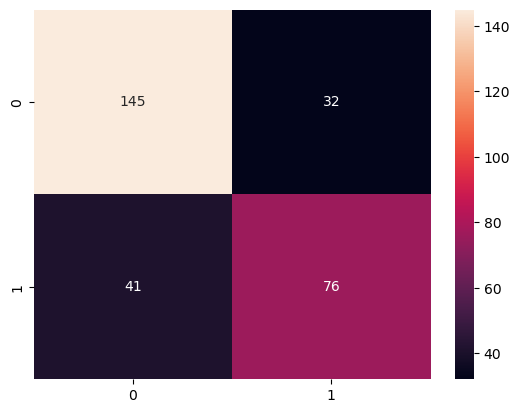

In [59]:
confusion=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion, annot=True, fmt='d')
classification=classification_report(y_test, y_pred)
print(classification)

# RANDOM FOREST

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rfc=RandomForestClassifier(n_estimators=100)

In [62]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [63]:
Y_pred=rfc.predict(x_test)

Accurecy: 0.8095238095238095
Classification Report for Random Forest Model              precision    recall  f1-score   support

           0       0.81      0.89      0.85       177
           1       0.80      0.69      0.74       117

    accuracy                           0.81       294
   macro avg       0.81      0.79      0.80       294
weighted avg       0.81      0.81      0.81       294



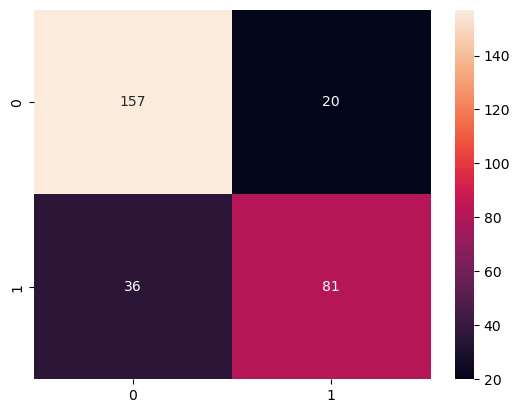

In [64]:
rfc_acc=accuracy_score(y_test, Y_pred)
print(f"Accurecy: {rfc_acc}")
rfc_report=classification_report(y_test, Y_pred)
print(f"Classification Report for Random Forest Model{rfc_report}")
rfc_conf=confusion_matrix(y_test, Y_pred)
sns.heatmap(rfc_conf, annot=True, fmt='d')
plt.show()

# TEST DATA

In [107]:
test1=pd.read_csv('data/test.csv')

In [108]:
test1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [109]:
test1=test1.drop(['PassengerId','Name','Ticket'], axis=1)

In [110]:
test1.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [111]:
test1=test1.drop(['Cabin'], axis=1)

In [112]:
test1.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [113]:

test1['Age']=test1['Age'].fillna(test1['Age'].median())

In [114]:
test1.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [115]:
test1['Fare']=test1['Fare'].fillna(test1['Fare'].median())

In [116]:
test1.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [117]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [128]:
test_dummy=pd.get_dummies(test1,columns=(['Embarked']))
test_dummy

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1
2,2,1,62.0,0,0,9.6875,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,0,0,1
414,1,0,39.0,0,0,108.9000,1,0,0
415,3,1,38.5,0,0,7.2500,0,0,1
416,3,1,27.0,0,0,8.0500,0,0,1


In [126]:
test1['Sex']=test1['Sex'].replace({'male':1,'female':0})

# Standarad Scaler


In [129]:
test_scale=StandardScaler()

In [130]:
test_scaler=test_scale.fit_transform(test_dummy)

In [131]:
x_test=pd.DataFrame(test_scaler)

In [132]:
xtest_pred=gnb.predict(x_test)

# Gender_submmission 

In [134]:
submission=pd.read_csv('data/gender_submission.csv')

In [135]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [137]:
test_accu=accuracy_score(submission['Survived'], xtest_pred)
print(f'Test Accurecy Score :{test_accu}')

Test Accurecy Score :0.8373205741626795


In [140]:
test_reports=classification_report(submission['Survived'], xtest_pred)
print(f'Classification Reports : {test_reports}')

Classification Reports :               precision    recall  f1-score   support

           0       0.87      0.88      0.87       266
           1       0.78      0.76      0.77       152

    accuracy                           0.84       418
   macro avg       0.83      0.82      0.82       418
weighted avg       0.84      0.84      0.84       418



Confusion Metrics : [[234  32]
 [ 36 116]]


<AxesSubplot:>

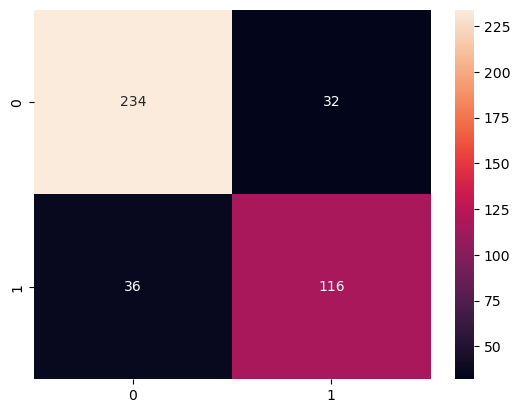

In [142]:
test_conf=confusion_matrix(submission['Survived'], xtest_pred)
print(f"Confusion Metrics : {test_conf}")
sns.heatmap(test_conf, annot= True, fmt='d')